<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
<h1> This notebook walks us through how to compute a tuning curve using the Allen Brain Observatory data </h1>
    
A tuning curve summarizes a neuron's response to stimulus categories. Here we will look at the responses of a neuron to the 'Drifting Gratings' stimulus.

The Drifting Gratings stimulus consists of a sinusoidal grating that moves in 8 directions and at 5 temporal frequencies. Each stimulus condition (direction + temporal frequency combination) is repeated 15 times in random order. In addition, there are blanksweeps (when the grating is replaced with mean luminance gray) interleaved among the trials.

We will compute the mean response of a neuron to each of these stimulus conditions.
</div>

<a href="https://colab.research.google.com/github/allenswdb/TReND-CaMinA/notebooks/Zambia25/07-to-10-Mon-toThu-AllenTutorial/Session_2_Tuning_Curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Standard imports

In [32]:
# %pip install allensdk

### Allen Brain Observatory set up

This instantiates the tools in the Allen SDK that allow us to access the Brain Observatory data.

In [33]:
# # run only once per runtime/session, and only if running in colab
# # the runtime will need to restart after
# %%capture
# !apt install s3fs
# !pip install allensdk
# !mkdir -p /data/allen-brain-observatory/
# !s3fs allen-brain-observatory /data/allen-brain-observatory/ -o public_bucket=1

# import time
# print("Runtime is now restarting...")
# print("You can ignore the error message [Your session crashed for an unknown reason.]")
# time.sleep(5)
# exit()

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset
from allensdk.brain_observatory.brain_observatory_exceptions import NoEyeTrackingException
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.model_selection import train_test_split
%matplotlib inline

In [64]:
# standard data access code
import os
import sys
import platform
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

# Set file location based on platform.
platstring = platform.platform()
if ('Darwin' in platstring) or ('macOS' in platstring):
    # macOS
    data_root = "/Volumes/TReND2025/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring) or ('google.colab' in sys.modules):
    # then on Code Ocean or Colab
    data_root = "/data/"
elif 'Linux' in platstring:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/kaloso/TReND2025/"

# if running locally without external drive, set a local path to download data
# data_root = '/path/to/data'

manifest_file = os.path.join(data_root,'allen-brain-observatory/visual-coding-2p/manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_file)

In [65]:
# dir(boc)

We'll look at one cell to start

In [66]:
# stimuli = boc.get_all_stimuli()
# stimuli

In [67]:
# cre_lines = boc.get_all_cre_lines()
# cre_lines

In [68]:
# exps = boc.get_experiment_containers()
# exps

<p>In order to compute the tuning curve of the neuron, we need to access

<li>the activity of the neuron.  We will use the DF/F trace
<li>stimulus information for the drifting grating stimulus

<p>We have written the function below that uses the AllenSDK to get these pieces of data. It does so by first identifying which experiment session contains the specified cell id and stimulus. It then accesses the NWB file for that session and reads the DF/F trace for the specified cell and the stimulus table for the specified stimulus.

In [69]:
# example with no eye tracking data
data = boc.get_ophys_experiment_data(569407590)
try:
    timestamps, locations = data.get_pupil_size()
except NoEyeTrackingException:
    print("No eye tracking for experiment %s." % data.get_metadata()["ophys_experiment_id"])

data = boc.get_ophys_experiment_data(569407590)

In [70]:
# data.get_metadata()

In [71]:
# dir(data)

In [72]:
timestamps, pupil_size = data.get_pupil_size()

In [73]:
pupil_size

array([2304.1182, 2334.3096, 2344.6594, ..., 2137.0088, 2137.9075,
       2151.5122], dtype=float32)

In [74]:
timestamps, neural_data = data.get_dff_traces()

In [75]:
neural_data.shape

(128, 114114)

In [76]:
X = neural_data
y = pupil_size

Text(0.5, 1.0, 'Actual Pupil Size')

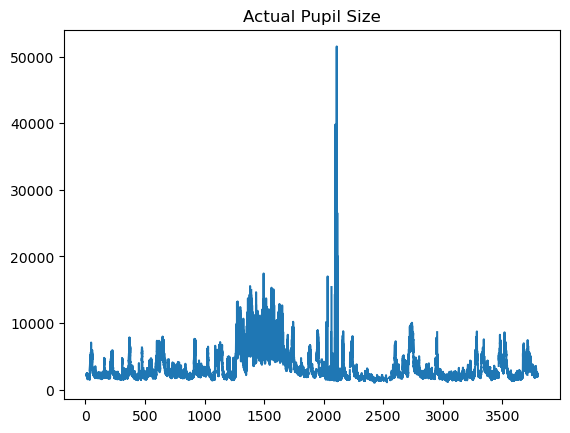

In [77]:
plt.plot(timestamps,y)
plt.title('Actual Pupil Size')

In [78]:
#Deep Learning Trial

In [79]:
# #split into training points
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)


In [80]:
#Trial 2.............

In [81]:
import torch.nn as nn

# class PupilPredictorImproved(nn.Module):
#     def __init__(self, input_size, hidden_size=128, dropout=0.3):
#         super(PupilPredictorImproved, self).__init__()
#         self.net = nn.Sequential(
#             nn.Linear(input_size, hidden_size),
#             nn.BatchNorm1d(hidden_size),
#             nn.ReLU(),
#             nn.Dropout(dropout),

#             nn.Linear(hidden_size, hidden_size),
#             nn.BatchNorm1d(hidden_size),
#             nn.ReLU(),
#             nn.Dropout(dropout),

#             nn.Linear(hidden_size, 1)  # Output layer
#         )

#     def forward(self, x):
#         return self.net(x)
# def train_model(model, train_loader, test_data, test_labels, epochs=300, lr=0.1):
#     criterion = nn.MSELoss()
#     optimizer = torch.optim.Adam(model.parameters(), lr=lr)
#     history = {"epoch": [], "train_loss": [], "test_loss": []}

#     for epoch in range(epochs):
#         model.train()
#         total_loss = 0
#         for batch_x, batch_y in train_loader:
#             optimizer.zero_grad()
#             pred = model(batch_x)
#             loss = criterion(pred, batch_y)
#             loss.backward()
#             optimizer.step()
#             total_loss += loss.item()

#         model.eval()
#         with torch.no_grad():
#             test_pred = model(test_data)
#             test_loss = criterion(test_pred, test_labels).item()

#         history["epoch"].append(epoch)
#         history["train_loss"].append(total_loss / len(train_loader))
#         history["test_loss"].append(test_loss)

#         if epoch % 50 == 0:
#             print(f"Epoch {epoch+1}: Train Loss = {total_loss:.4f}, Test Loss = {test_loss:.4f}")

#     return history


In [82]:
class PupilPredictorImproved(nn.Module):
    def __init__(self, input_size, hidden_size=256, dropout=0.3):
        super(PupilPredictorImproved, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(hidden_size, 1)
        )

    def forward(self, x):
        return self.net(x)

In [104]:
def train_model(model, train_loader, test_data, test_labels, epochs=80, lr=0.001):
    criterion = nn.MSELoss()
    # optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=10, factor=0.5)
    history = {"epoch": [], "train_loss": [], "test_loss": []}
    best_loss = float("inf")
    patience_counter = 0
    early_stop_patience = 20

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            pred = model(batch_x)
            loss = criterion(pred, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_train_loss = total_loss / len(train_loader)

        model.eval()
        with torch.no_grad():
            test_pred = model(test_data)
            test_loss = criterion(test_pred, test_labels).item()
        
        scheduler.step(test_loss)

        history["epoch"].append(epoch)
        history["train_loss"].append(avg_train_loss)
        history["test_loss"].append(test_loss)

        if epoch % 50 == 0:
            print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Test Loss = {test_loss:.4f}")

        # Early stopping
        if test_loss < best_loss:
            best_loss = test_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= early_stop_patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

    return history

In [105]:
def shift_data(X, y, lag=22):
    """
    Shift X and y so that X[t] corresponds to y[t + lag].
    """
    X_shifted = X[:-lag]
    y_shifted = y[lag:]
    return X_shifted, y_shifted

In [106]:
# Convert to float32 for PyTorch
X = neural_data.T.astype(np.float32)
y = pupil_size.reshape(-1, 1).astype(np.float32)

# # Clean NaNs
# valid_mask = ~np.isnan(y).flatten()
# X_clean = X[valid_mask]
# y_clean = y[valid_mask]

X, y = shift_data(X, y, lag=22)

# Convert to DataFrames for interpolation
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y, columns=["target"])

# Perform linear interpolation (along rows), then fill edges
X_interp = X_df.interpolate(method='linear', axis=0).ffill().bfill()
y_interp = y_df.interpolate(method='linear', axis=0).ffill().bfill()

# Restore variable names
X_clean = X_interp.to_numpy(dtype=np.float32)
y_clean = y_interp.to_numpy(dtype=np.float32)


In [107]:
from scipy.signal import savgol_filter

# Apply to pupil size (y_clean)
y_clean = savgol_filter(y_clean.ravel(), window_length=101, polyorder=3).reshape(-1, 1).astype(np.float32)

In [108]:
# # Subsample to 5000 samples
# sample_size = 5000
# idx = np.random.choice(len(X_clean), size=sample_size, replace=False)

# X_sample = X_clean[idx]
# y_sample = y_clean[idx].ravel()

# kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0)
# gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.0)

# gpr.fit(X_sample, y_sample)
# y_smoothed_subset = gpr.predict(X_clean).reshape(-1, 1).astype(np.float32)

# # Replace original target with smoothed version
# y_clean = y_smoothed_subset

In [109]:
# # 3. Apply GPR to clean y_clean (OPTIONAL BUT POWERFUL)

# kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0)
# gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.0)
# gpr.fit(X_clean, y_clean.ravel())
# y_clean_smoothed, sigma = gpr.predict(X_clean, return_std=True)
# y_clean = y_clean_smoothed.reshape(-1, 1).astype(np.float32)

In [110]:
# Standardize inputs and targets
from sklearn.preprocessing import StandardScaler, RobustScaler
# x_scaler = StandardScaler()
# y_scaler = StandardScaler()

x_scaler = RobustScaler()
y_scaler = RobustScaler()


X_scaled = x_scaler.fit_transform(X_clean)
y_scaled = y_scaler.fit_transform(y_clean)

In [111]:
# plt.plot(timestamps[19:],y_clean)
# plt.title('Pupil size after cleaning')

In [112]:
def aggregate_by_window(X, y, window_size=20):
    num_windows = len(X) - window_size + 1
    X_windowed = np.array([X[i:i+window_size].mean(axis=0) for i in range(num_windows)])
    y_windowed = np.array([y[i+window_size//2] for i in range(num_windows)])
    return X_windowed, y_windowed

X_agg, y_agg = aggregate_by_window(X_scaled, y_scaled, window_size=5)
X_train, X_test, y_train, y_test = train_test_split(X_agg, y_agg, test_size=0.2, random_state=42)

In [113]:
# # Split and tensorize
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [114]:
train_dataset = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_data = torch.tensor(X_test)
test_labels = torch.tensor(y_test)

In [115]:
model = PupilPredictorImproved(input_size=X.shape[1])
history = train_model(model, train_loader, test_data, test_labels)

Epoch 1: Train Loss = 0.5959, Test Loss = 0.4603
Epoch 51: Train Loss = 0.2416, Test Loss = 0.2271


In [116]:
from sklearn.metrics import r2_score

model.eval()
with torch.no_grad():
    y_pred = model(test_data).numpy()
    y_pred_unscaled = y_scaler.inverse_transform(y_pred)
    y_actual_unscaled = y_scaler.inverse_transform(test_labels.numpy())

r2 = r2_score(y_actual_unscaled, y_pred_unscaled)
print(f"R² Score: {r2:.4f}")

R² Score: 0.7526


In [157]:
actual = y_actual_unscaled
predicted = y_pred_unscaled

# print(len(predicted))
# (np.mean(actual)) - (np.mean(predicted))*100

22818


In [161]:
mse = (np.sqrt(np.mean((actual-predicted)**2)) / 22818) *100
mse

3.819885173660186

In [153]:
np.mean(actual)

3167.389

/tmp/ipykernel_36663/3851613345.py:11: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_36663/3851613345.py:15: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig('DNN.png')
/home/kaloso/anaconda3/envs/geo/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


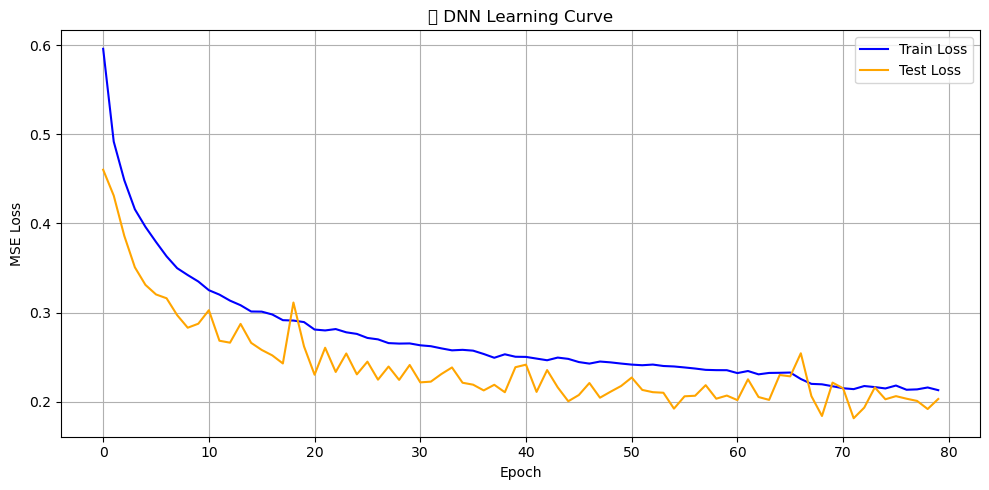

In [136]:
def plot_learning_curve(history):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 5))
    plt.plot(history["epoch"], history["train_loss"], label="Train Loss", color="blue")
    plt.plot(history["epoch"], history["test_loss"], label="Test Loss", color="orange")
    plt.title("📉 DNN Learning Curve")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    # plt.show()

plot_learning_curve(history)
plt.savefig('DNN.png')

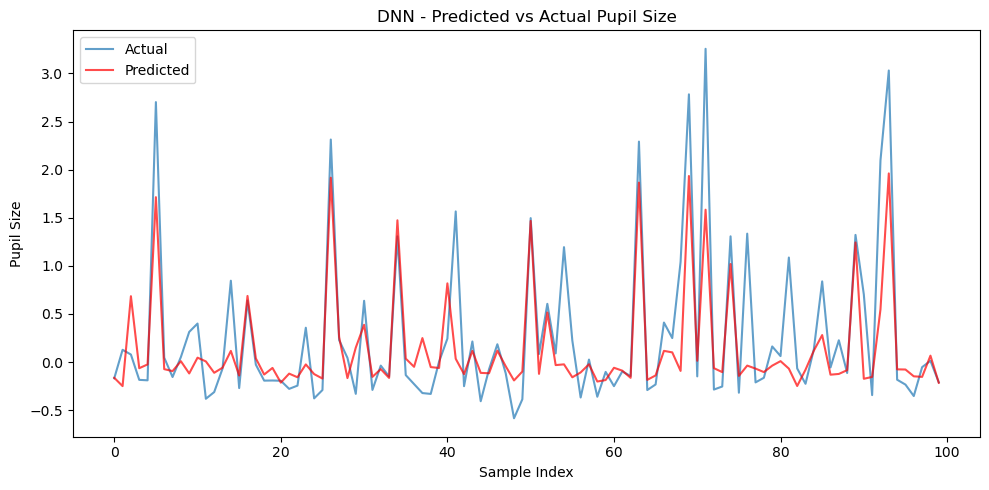

In [130]:
model.eval()
with torch.no_grad():
    y_pred = model(test_data).numpy()
# plot_predictions(test_labels.numpy(), y_pred)

def plot_predictions(y_true, y_pred, num_samples=100):
    plt.figure(figsize=(10, 5))
    plt.plot(y_true[:num_samples], label='Actual', alpha=0.7)
    plt.plot(y_pred[:num_samples], label='Predicted', alpha=0.7, color="red")
    plt.xlabel('Sample Index')
    plt.ylabel('Pupil Size')
    plt.title('DNN - Predicted vs Actual Pupil Size')
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_predictions(test_labels.numpy(), y_pred)

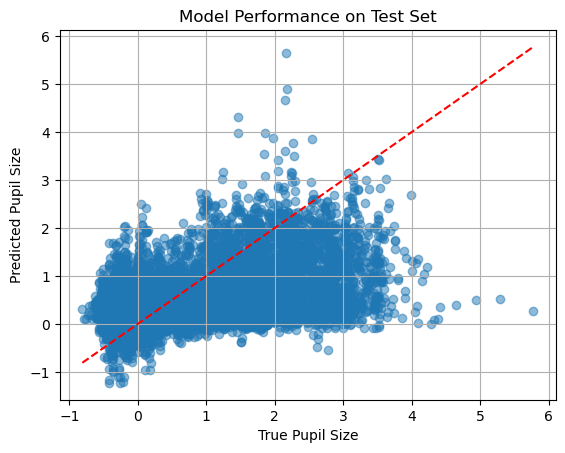

In [144]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Pupil Size")
plt.ylabel("Predicted Pupil Size")
plt.title("Model Performance on Test Set")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.grid(True)
plt.show()

In [125]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [135]:
# Define a lightweight MLP
mlp = MLPRegressor(hidden_layer_sizes=(64,),  # one hidden layer with 64 units
                   activation='relu',
                   solver='adam',
                   alpha=1e-4,
                   learning_rate='adaptive',
                   max_iter=500,
                   random_state=42)

# Train
mlp.fit(X_train, y_train.ravel())

# Predict
y_pred = mlp.predict(X_test)

# Evaluate
# Calculate RMSE manually
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"R² score: {r2:.3f}")
# print(f"RMSE: {rmse:.4f}")

R² score: 0.568


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_true, label='Actual',color='blue')
plt.plot(y_pred, label='Predicted', color='magenta')
plt.xlabel('Sample Index')
plt.ylabel('Pupil Size')

In [133]:
def plot_predict_mlp(y_true, y_pred, num_samples=100):
    plt.figure(figsize=(10, 5))
    plt.plot(y_true[:num_samples], label='Actual', alpha=0.7)
    plt.plot(y_pred[:num_samples], label='Predicted', alpha=0.7, color="red")
    plt.xlabel('Sample Index')
    plt.ylabel('Pupil Size')
    plt.title('Predicted vs Actual Pupil Size')
    plt.legend()
    plt.tight_layout()
    plt.show()

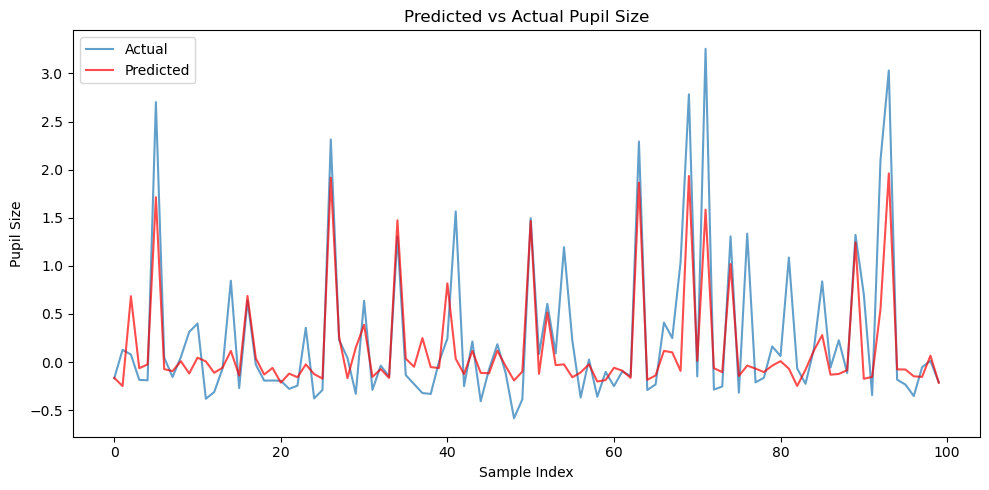

In [134]:
plot_predict_mlp(test_labels.numpy(), y_pred)

In [140]:
from sklearn.linear_model import LinearRegression
# LInear regression model

# Train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict
y_pred = linear_model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Linear Regression R² score: {r2:.4f}")
# print(f"Linear Regression RMSE: {rmse:.4f}")

Linear Regression R² score: 0.2219
